In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../benchmark/results/benchmark_results_2025-06-03_11-23-25.csv")


In [4]:
df

,Timestamp,Operation,Total Requests,Concurrency,Total Time (s),Average Latency (ms),Fastest (ms),Slowest (ms),RPS,Error Count,Error Rate,P50 (ms),P75 (ms),P90 (ms),P95 (ms),P99 (ms),P99.9 (ms)
0,2025-06-03T11:23:25+05:30,NaN,2000,50,137429302.0,4859406.0,382829.0,21126943.0,14552.94,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2025-06-03T11:23:25+05:30,NaN,2000,50,118055278.0,4088552.0,336129.0,28377549.0,16941.22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-06-03T11:23:25+05:30,NaN,2000,50,122950208.0,4548545.0,549029.0,26786382.0,16266.75,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


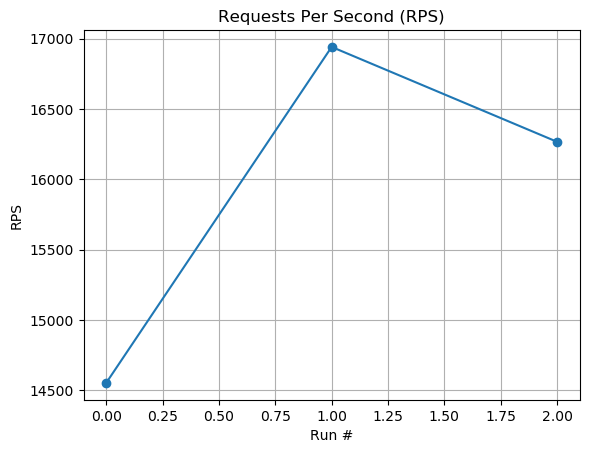

In [5]:
plt.plot(df.index, df['RPS'], marker='o')
plt.title('Requests Per Second (RPS)')
plt.xlabel('Run #')
plt.ylabel('RPS')
plt.grid()
plt.show()


In [7]:
import pandas as pd

# Load both result files
df_std = pd.read_csv("../benchmark/results/benchmark_results_std_map.csv")
df_std['Engine'] = 'std::map'

df_boost = pd.read_csv("../benchmark/results/benchmark_results_boost_map.csv")
df_boost['Engine'] = 'boost::map'

# Combine into one DataFrame
df = pd.concat([df_std, df_boost], ignore_index=True)


In [13]:
import pandas as pd

# Load your dataframe (already with 'Engine' column as shown before)

# Assign operation names in the right order (repeat if multiple runs)
op_list = ['Put', 'Get', 'Delete']
df['Operation'] = df['Operation'].fillna(pd.Series(op_list * (len(df) // len(op_list))))

# Now you can analyze/plot as before
print(df[['Operation', 'Engine', 'RPS', 'Average Latency (ms)']])


  Operation      Engine     RPS  Average Latency (ms)
0       Put    std::map  999.18                363.51
1       Get    std::map  999.33                364.47
2    Delete    std::map  999.61                348.93
3       Put  boost::map  999.21                365.07
4       Get  boost::map  999.26                371.91
5    Delete  boost::map  999.43                358.22


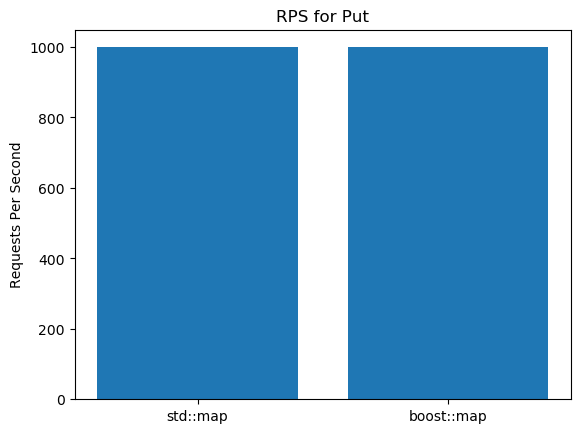

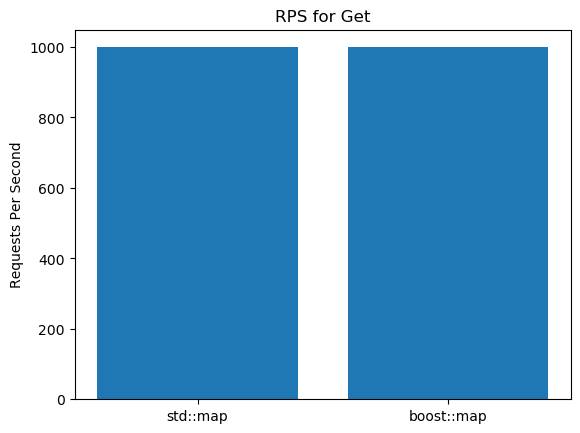

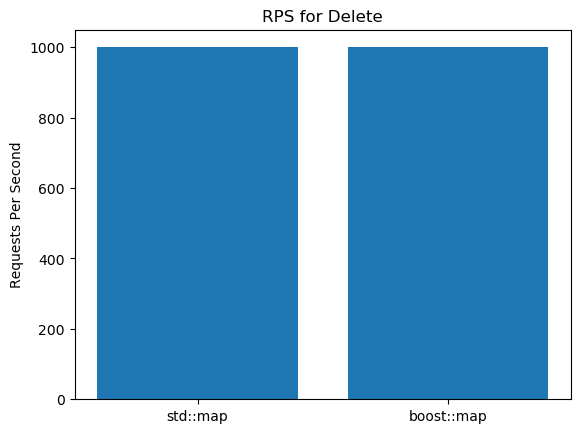

In [14]:
import matplotlib.pyplot as plt

for op in df['Operation'].unique():
    subset = df[df['Operation'] == op]
    plt.bar(subset['Engine'], subset['RPS'])
    plt.title(f'RPS for {op}')
    plt.ylabel('Requests Per Second')
    plt.show()



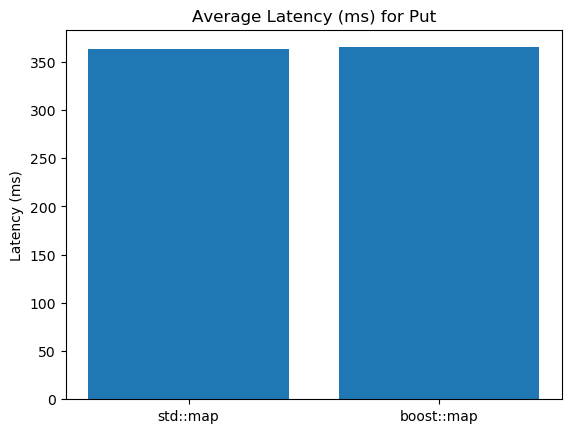

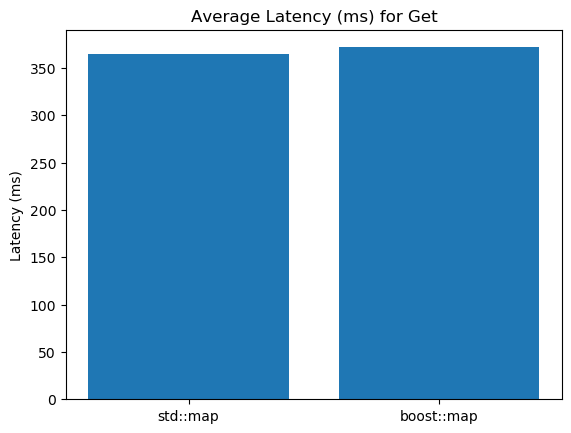

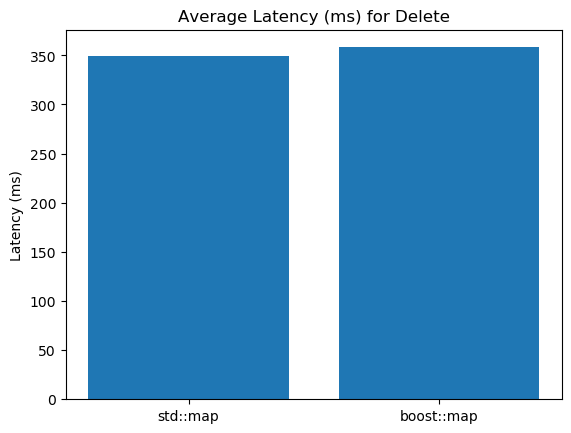

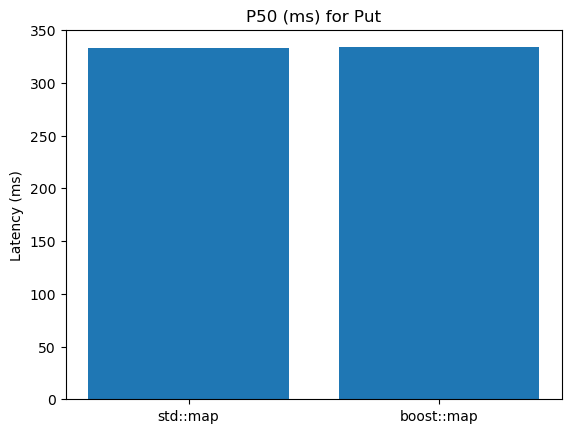

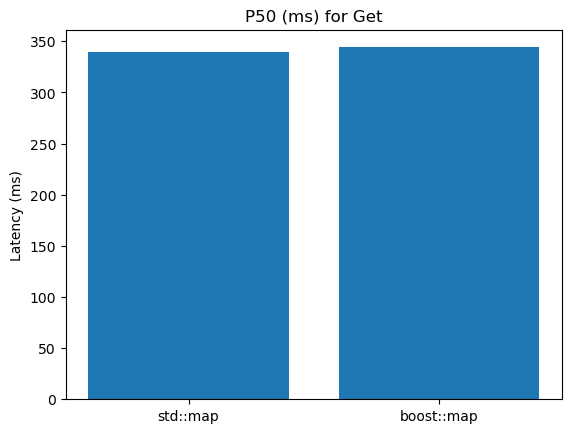

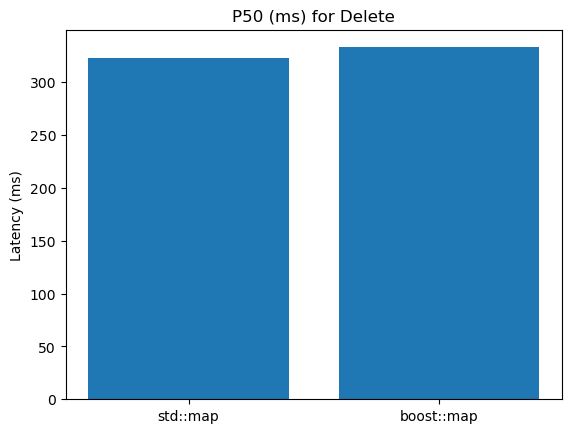

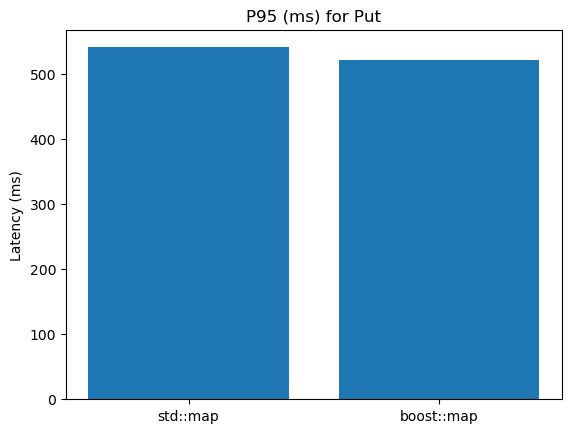

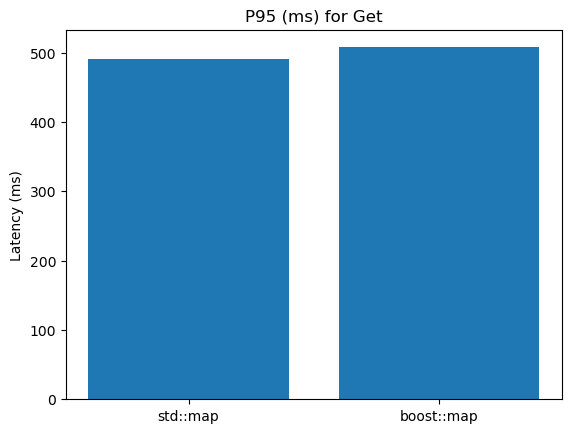

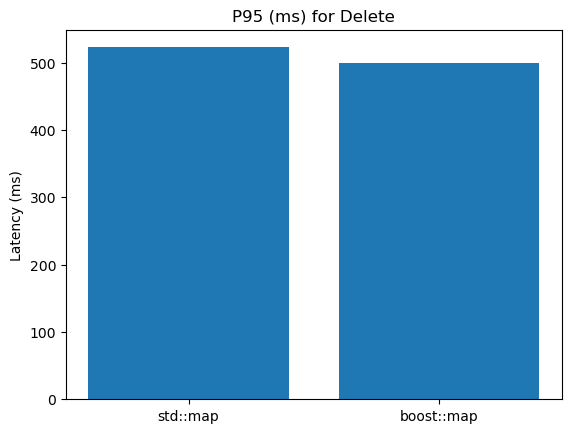

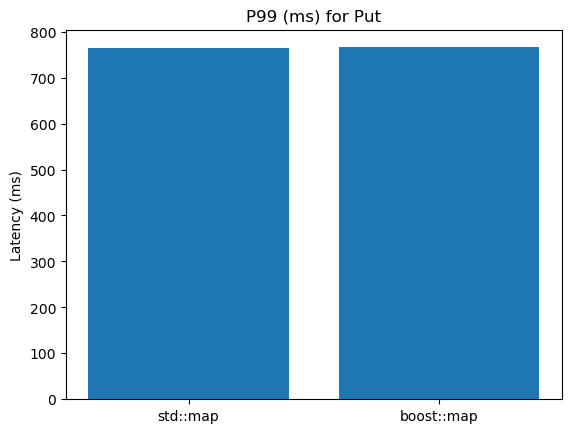

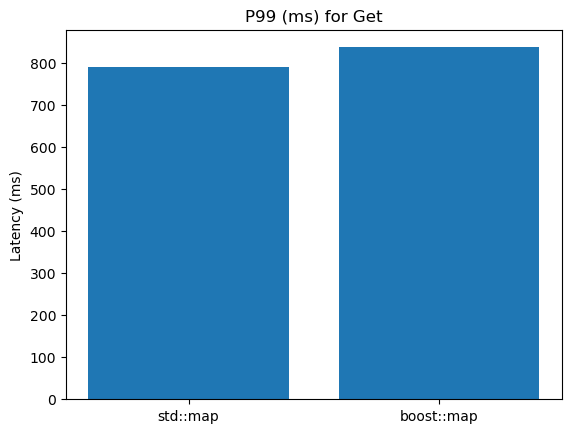

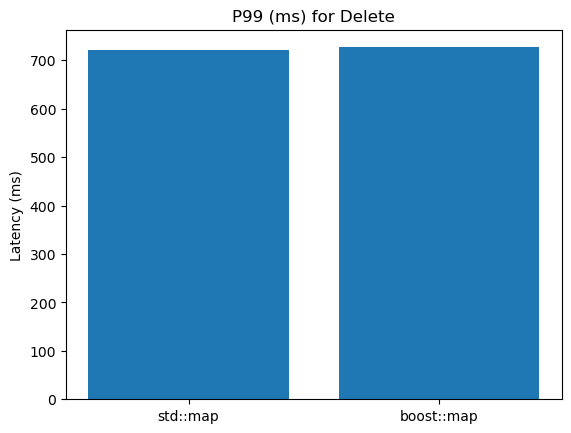

In [15]:
latency_cols = ['Average Latency (ms)', 'P50 (ms)', 'P95 (ms)', 'P99 (ms)']
for col in latency_cols:
    for op in df['Operation'].unique():
        subset = df[df['Operation'] == op]
        plt.bar(subset['Engine'], subset[col])
        plt.title(f'{col} for {op}')
        plt.ylabel('Latency (ms)')
        plt.show()


In [16]:
print(df[['Operation', 'Engine', 'RPS', 'Average Latency (ms)', 'P95 (ms)', 'P99 (ms)']])


  Operation      Engine     RPS  Average Latency (ms)  P95 (ms)  P99 (ms)
0       Put    std::map  999.18                363.51    541.27    765.55
1       Get    std::map  999.33                364.47    491.33    789.95
2    Delete    std::map  999.61                348.93    522.67    722.06
3       Put  boost::map  999.21                365.07    521.55    766.05
4       Get  boost::map  999.26                371.91    507.63    837.59
5    Delete  boost::map  999.43                358.22    499.83    726.77


In [28]:

df = pd.read_csv('../benchmark/results/cpp_map_percentile_bench.csv')
print(df)


           MapType  TotalOps  insert_us_avg  insert_us_min  insert_us_max  \
0         std::map   1000000       0.680833           0.08         37.591   
1       boost::map   1000000       0.615338           0.04         49.460   
2  boost::flat_map   1000000      59.264600           0.03        949.825   

   insert_us_p50  insert_us_p75  insert_us_p90  insert_us_p95  insert_us_p99  \
0           0.67           0.87          1.060           1.19          2.210   
1           0.61           0.80          0.960           1.08          2.100   
2          41.55          86.79        140.441         177.04        247.271   

   ...  find_us_p95  find_us_p99  erase_us_avg  erase_us_min  erase_us_max  \
0  ...         0.93         1.10      0.678705          0.06        42.780   
1  ...         0.90         1.07      0.683495          0.07        45.290   
2  ...         0.32         0.45     58.887000          0.04       937.435   

   erase_us_p50  erase_us_p75  erase_us_p90  erase_us_p95

In [29]:
# Separate metrics for easier plotting
insert_cols = [col for col in df.columns if col.startswith('insert')]
find_cols   = [col for col in df.columns if col.startswith('find')]
erase_cols  = [col for col in df.columns if col.startswith('erase')]

# Combine for plotting
df_insert = df[['MapType'] + insert_cols].set_index('MapType')
df_find   = df[['MapType'] + find_cols].set_index('MapType')
df_erase  = df[['MapType'] + erase_cols].set_index('MapType')


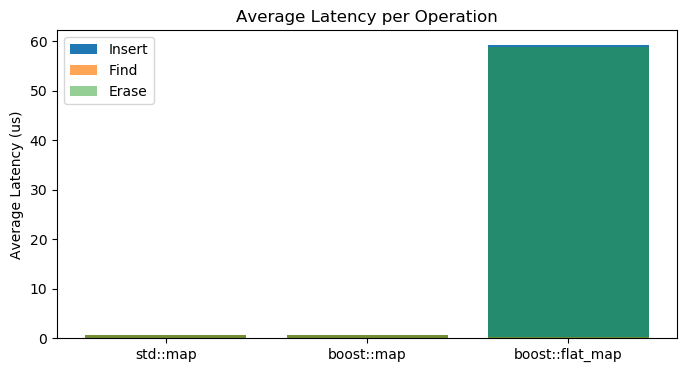

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(df['MapType'], df['insert_us_avg'], label='Insert')
plt.bar(df['MapType'], df['find_us_avg'], label='Find', alpha=0.7)
plt.bar(df['MapType'], df['erase_us_avg'], label='Erase', alpha=0.5)
plt.ylabel('Average Latency (us)')
plt.title('Average Latency per Operation')
plt.legend()
plt.show()


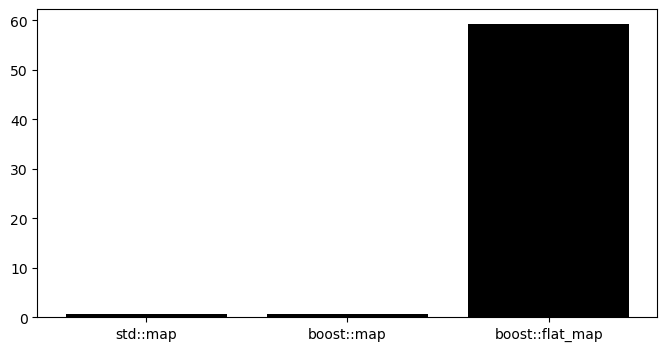

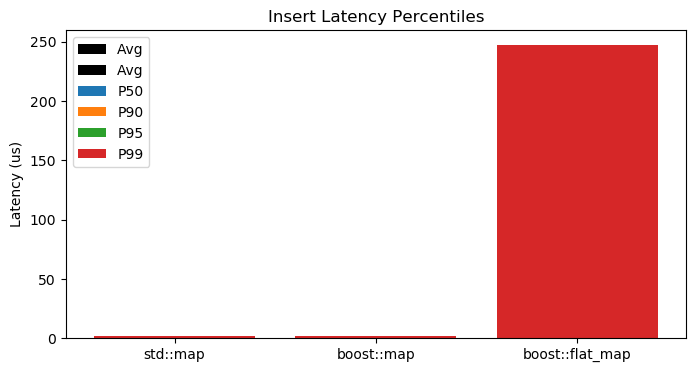

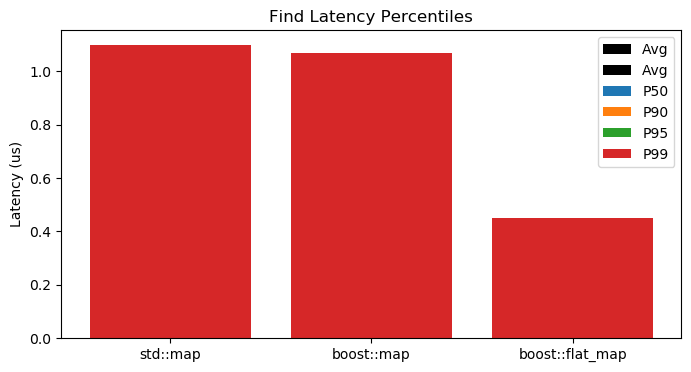

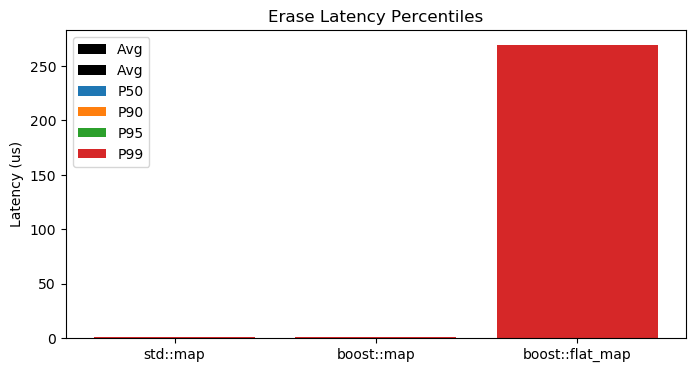

In [33]:
for op_type, op_df in zip(['Insert', 'Find', 'Erase'], [df_insert, df_find, df_erase]):
    plt.figure(figsize=(8,4))
    plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_avg'], label='Avg', color='black')
    plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_avg'], label='Avg', color='black')
    for percentile in ['p50','p90','p95','p99']:
        plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_{percentile}'], label=percentile.upper())
    plt.ylabel('Latency (us)')
    plt.title(f'{op_type} Latency Percentiles')
    plt.legend()
    plt.show()


In [32]:
df.head()

,MapType,TotalOps,insert_us_avg,insert_us_min,insert_us_max,insert_us_p50,insert_us_p75,insert_us_p90,insert_us_p95,insert_us_p99,...,find_us_p95,find_us_p99,erase_us_avg,erase_us_min,erase_us_max,erase_us_p50,erase_us_p75,erase_us_p90,erase_us_p95,erase_us_p99
0,std::map,1000000,0.680833,0.08,37.591,0.67,0.87,1.060,1.19,2.210,...,0.93,1.10,0.678705,0.06,42.780,0.70,0.89,1.05,1.150,1.360
1,boost::map,1000000,0.615338,0.04,49.460,0.61,0.80,0.960,1.08,2.100,...,0.90,1.07,0.683495,0.07,45.290,0.70,0.90,1.07,1.170,1.390
2,boost::flat_map,1000000,59.264600,0.03,949.825,41.55,86.79,140.441,177.04,247.271,...,0.32,0.45,58.887000,0.04,937.435,41.43,84.75,135.91,173.721,269.561


In [34]:
compare_cols = [
    'insert_us_avg','insert_us_avg','insert_us_p50','insert_us_p95','insert_us_p99',
    'find_us_avg','find_us_p50','find_us_p95','find_us_p99',
    'erase_us_avg','erase_us_p50','erase_us_p95','erase_us_p99'
]
print(df[['MapType'] + compare_cols])


           MapType  insert_us_avg  insert_us_avg  insert_us_p50  \
0         std::map       0.680833       0.680833           0.67   
1       boost::map       0.615338       0.615338           0.61   
2  boost::flat_map      59.264600      59.264600          41.55   

   insert_us_p95  insert_us_p99  find_us_avg  find_us_p50  find_us_p95  \
0           1.19          2.210     0.635780         0.62         0.93   
1           1.08          2.100     0.602750         0.59         0.90   
2         177.04        247.271     0.195017         0.18         0.32   

   find_us_p99  erase_us_avg  erase_us_p50  erase_us_p95  erase_us_p99  
0         1.10      0.678705          0.70         1.150         1.360  
1         1.07      0.683495          0.70         1.170         1.390  
2         0.45     58.887000         41.43       173.721       269.561  


In [35]:

df = pd.read_csv('../benchmark/results/map_vs_pool_vs_intrusive.csv')
print(df)


            MapType  TotalOps  insert_us_avg  insert_us_min  insert_us_max  \
0          std::map   1000000       0.679286           0.07          29.80   
1     std::map_pool   1000000       0.599414           0.05        8752.61   
2  intrusive_rbtree   1000000       0.488276           0.03          30.90   

   insert_us_p50  insert_us_p75  insert_us_p90  insert_us_p95  insert_us_p99  \
0           0.66           0.87           1.06           1.19           2.23   
1           0.58           0.77           0.94           1.05           1.26   
2           0.48           0.67           0.82           0.91           1.11   

   ...  find_us_p95  find_us_p99  erase_us_avg  erase_us_min  erase_us_max  \
0  ...         0.95         1.14      0.674476          0.06         32.09   
1  ...         0.92         1.12      0.617686          0.04         31.34   
2  ...         0.83         1.01      0.589891          0.04         45.75   

   erase_us_p50  erase_us_p75  erase_us_p90  erase_us

In [36]:
# Separate metrics for easier plotting
insert_cols = [col for col in df.columns if col.startswith('insert')]
find_cols   = [col for col in df.columns if col.startswith('find')]
erase_cols  = [col for col in df.columns if col.startswith('erase')]

# Combine for plotting
df_insert = df[['MapType'] + insert_cols].set_index('MapType')
df_find   = df[['MapType'] + find_cols].set_index('MapType')
df_erase  = df[['MapType'] + erase_cols].set_index('MapType')


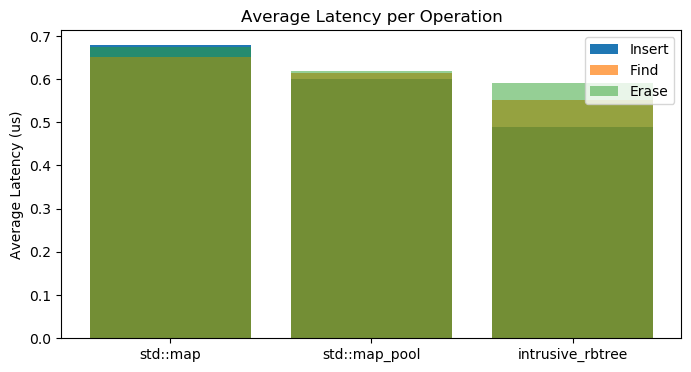

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(df['MapType'], df['insert_us_avg'], label='Insert')
plt.bar(df['MapType'], df['find_us_avg'], label='Find', alpha=0.7)
plt.bar(df['MapType'], df['erase_us_avg'], label='Erase', alpha=0.5)
plt.ylabel('Average Latency (us)')
plt.title('Average Latency per Operation')
plt.legend()
plt.show()


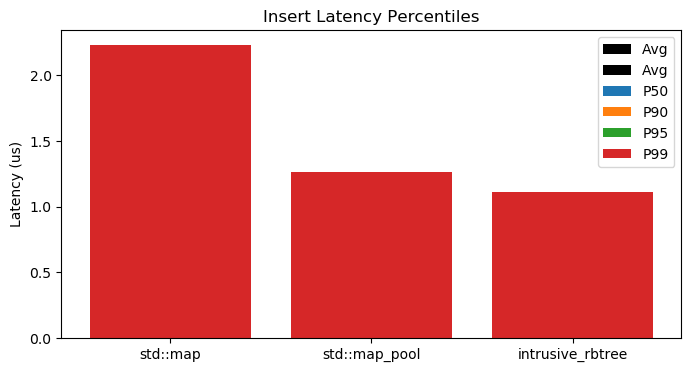

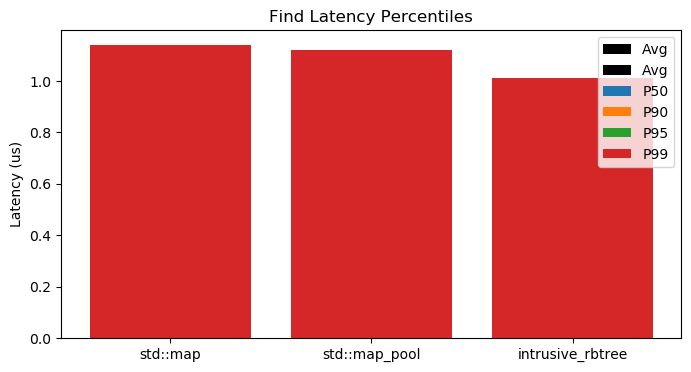

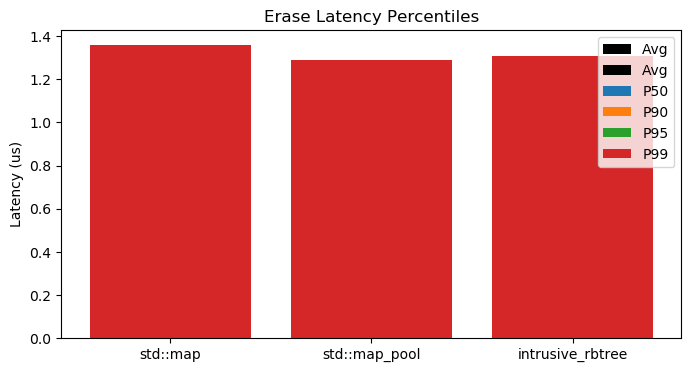

In [38]:
for op_type, op_df in zip(['Insert', 'Find', 'Erase'], [df_insert, df_find, df_erase]):
    plt.figure(figsize=(8,4))
    plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_avg'], label='Avg', color='black')
    plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_avg'], label='Avg', color='black')
    for percentile in ['p50','p90','p95','p99']:
        plt.bar(op_df.index, op_df[f'{op_type.lower()}_us_{percentile}'], label=percentile.upper())
    plt.ylabel('Latency (us)')
    plt.title(f'{op_type} Latency Percentiles')
    plt.legend()
    plt.show()


In [39]:
df.head()

,MapType,TotalOps,insert_us_avg,insert_us_min,insert_us_max,insert_us_p50,insert_us_p75,insert_us_p90,insert_us_p95,insert_us_p99,...,find_us_p95,find_us_p99,erase_us_avg,erase_us_min,erase_us_max,erase_us_p50,erase_us_p75,erase_us_p90,erase_us_p95,erase_us_p99
0,std::map,1000000,0.679286,0.07,29.80,0.66,0.87,1.06,1.19,2.23,...,0.95,1.14,0.674476,0.06,32.09,0.69,0.89,1.05,1.150,1.36
1,std::map_pool,1000000,0.599414,0.05,8752.61,0.58,0.77,0.94,1.05,1.26,...,0.92,1.12,0.617686,0.04,31.34,0.63,0.83,0.98,1.089,1.29
2,intrusive_rbtree,1000000,0.488276,0.03,30.90,0.48,0.67,0.82,0.91,1.11,...,0.83,1.01,0.589891,0.04,45.75,0.59,0.80,0.98,1.080,1.31


In [10]:
compare_cols = [
    'insert_us_avg','insert_us_avg','insert_us_p50','insert_us_p95','insert_us_p99',
    'find_us_avg','find_us_p50','find_us_p95','find_us_p99',
    'erase_us_avg','erase_us_p50','erase_us_p95','erase_us_p99'
]
print(df[['MapType'] + compare_cols])


              MapType  insert_us_avg  insert_us_avg  insert_us_p50  \
0            std::map        0.31950        0.31950           0.27   
1       std::map_pool        0.29810        0.29810           0.22   
2    intrusive_rbtree        0.18000        0.18000           0.17   
3            std::map        0.37415        0.37415           0.29   
4       std::map_pool        0.20640        0.20640           0.20   
..                ...            ...            ...            ...   
157     std::map_pool        1.88320        1.88320           1.89   
158  intrusive_rbtree        1.78291        1.78291           1.80   
159          std::map        2.03716        2.03716           2.03   
160     std::map_pool        1.93154        1.93154           1.94   
161  intrusive_rbtree        1.83919        1.83919           1.85   

     insert_us_p95  insert_us_p99  find_us_avg  find_us_p50  find_us_p95  \
0             0.40           4.31      0.12730         0.13         0.17   
1      

In [48]:
df_small = pd.read_csv("../benchmark/results/map_vs_pool_vs_intrusive_vs_op_count_below100k.csv")
df_medium = pd.read_csv("../benchmark/results/map_vs_pool_vs_intrusive_vs_op_count_below1M.csv")
df_large = pd.read_csv("../benchmark/results/map_vs_pool_vs_intrusive_vs_op_count_below20M.csv")
df = pd.concat([df_small, df_medium, df_large])

In [14]:
df = pd.read_csv("../benchmark/results/map_vs_pool_vs_intrusive_vs_op_count_from_100_to_9_million_100avg.csv")


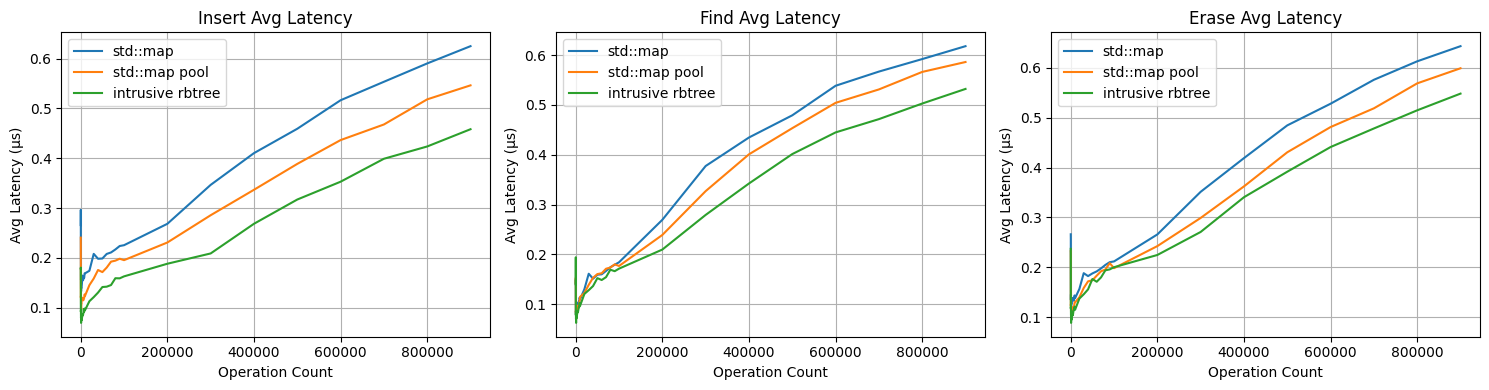


% Gain of Intrusive RBTree over std::map and std::map_pool:

Insert -- vs std::map:
OpsCount
100       32.69
200       39.11
300       56.78
400       41.98
500       39.65
600       49.42
700       41.43
800       50.57
900       47.54
1000      40.28
2000      47.34
3000      47.38
4000      47.39
5000      45.37
6000      43.60
7000      39.81
8000      42.38
9000      41.78
10000     43.60
20000     35.06
30000     41.67
40000     34.19
50000     28.77
60000     31.57
70000     30.98
80000     26.58
90000     28.95
100000    27.72
200000    29.83
300000    39.68
400000    34.54
500000    30.92
600000    31.65
700000    27.90
800000    28.22
900000    26.66
Name: insert_us_avg, dtype: float64

Insert -- vs std::map_pool:
OpsCount
100       25.62
200       20.28
300       27.44
400       22.52
500       23.53
600       34.75
700       25.33
800       36.34
900       27.79
1000      20.79
2000      34.25
3000      30.99
4000      27.94
5000      28.45
6000      23.00
7000      18.22


In [15]:

# Pivot for easier plotting
pivot = df.pivot(index="OpsCount", columns="MapType")

# Plot average latency for each operation type
plt.figure(figsize=(15, 4))

for i, op in enumerate(["insert", "find", "erase"]):
    plt.subplot(1, 3, i + 1)
    for m in ["std::map", "std::map_pool", "intrusive_rbtree"]:
        plt.plot(
            df[df["MapType"] == m]["OpsCount"],
            df[df["MapType"] == m][f"{op}_us_avg"],
            label=m.replace("_", " ")
        )
    plt.xlabel("Operation Count")
    plt.ylabel("Avg Latency (μs)")
    plt.title(f"{op.capitalize()} Avg Latency")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# --- Print percent gain from intrusive_rbtree over std::map and std::map_pool
print("\n% Gain of Intrusive RBTree over std::map and std::map_pool:\n")

for op in ["insert", "find", "erase"]:
    std_map = df[df["MapType"] == "std::map"].set_index("OpsCount")[f"{op}_us_avg"]
    pool = df[df["MapType"] == "std::map_pool"].set_index("OpsCount")[f"{op}_us_avg"]
    intrusive = df[df["MapType"] == "intrusive_rbtree"].set_index("OpsCount")[f"{op}_us_avg"]
    gain_std = (std_map - intrusive) / std_map * 100
    gain_pool = (pool - intrusive) / pool * 100
    print(f"{op.capitalize()} -- vs std::map:\n{gain_std.round(2)}\n")
    print(f"{op.capitalize()} -- vs std::map_pool:\n{gain_pool.round(2)}\n")



In [16]:
df.head()

,MapType,OpsCount,insert_us_avg,insert_us_min,insert_us_max,insert_us_p50,insert_us_p75,insert_us_p90,insert_us_p95,insert_us_p99,...,find_us_p95,find_us_p99,erase_us_avg,erase_us_min,erase_us_max,erase_us_p50,erase_us_p75,erase_us_p90,erase_us_p95,erase_us_p99
0,std::map,100,0.266120,0.196,1.144,0.248,0.280,0.3160,0.346,1.144,...,0.160,0.172,0.266070,0.168,0.688,0.260,0.284,0.306,0.3240,0.688
1,std::map_pool,100,0.240836,0.174,1.216,0.218,0.240,0.2580,0.280,1.216,...,0.160,0.166,0.231940,0.166,0.338,0.226,0.250,0.264,0.2880,0.338
2,intrusive_rbtree,100,0.179136,0.126,0.278,0.176,0.194,0.2080,0.224,0.278,...,0.162,0.172,0.236818,0.164,0.414,0.234,0.256,0.284,0.2980,0.414
3,std::map,200,0.296607,0.174,0.428,0.296,0.318,0.3380,0.354,0.422,...,0.168,0.180,0.256127,0.142,0.374,0.256,0.274,0.298,0.3180,0.372
4,std::map_pool,200,0.226547,0.166,0.276,0.228,0.242,0.2598,0.264,0.274,...,0.172,0.180,0.231358,0.160,0.324,0.230,0.246,0.266,0.2898,0.300


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'OpsCount' is int (sometimes gets imported as object/string)
df['OpsCount'] = df['OpsCount'].astype(int)

# Pivot dataframe for easier comparison
df_pivot = df.pivot(index='OpsCount', columns='MapType')

# Calculate % gain: (competing - intrusive) / competing * 100
insert_gain_std = ((df_pivot['insert_us_avg']['std::map'] - df_pivot['insert_us_avg']['intrusive_rbtree']) /
                   df_pivot['insert_us_avg']['std::map']) * 100

insert_gain_pool = ((df_pivot['insert_us_avg']['std::map_pool'] - df_pivot['insert_us_avg']['intrusive_rbtree']) /
                    df_pivot['insert_us_avg']['std::map_pool']) * 100

find_gain_std = ((df_pivot['find_us_avg']['std::map'] - df_pivot['find_us_avg']['intrusive_rbtree']) /
                 df_pivot['find_us_avg']['std::map']) * 100

find_gain_pool = ((df_pivot['find_us_avg']['std::map_pool'] - df_pivot['find_us_avg']['intrusive_rbtree']) /
                  df_pivot['find_us_avg']['std::map_pool']) * 100

erase_gain_std = ((df_pivot['erase_us_avg']['std::map'] - df_pivot['erase_us_avg']['intrusive_rbtree']) /
                  df_pivot['erase_us_avg']['std::map']) * 100

erase_gain_pool = ((df_pivot['erase_us_avg']['std::map_pool'] - df_pivot['erase_us_avg']['intrusive_rbtree']) /
                   df_pivot['erase_us_avg']['std::map_pool']) * 100


In [18]:
gains = pd.DataFrame({
    'Insert_vs_std': insert_gain_std,
    'Insert_vs_pool': insert_gain_pool,
    'Find_vs_std': find_gain_std,
    'Find_vs_pool': find_gain_pool,
    'Erase_vs_std': erase_gain_std,
    'Erase_vs_pool': erase_gain_pool,
})


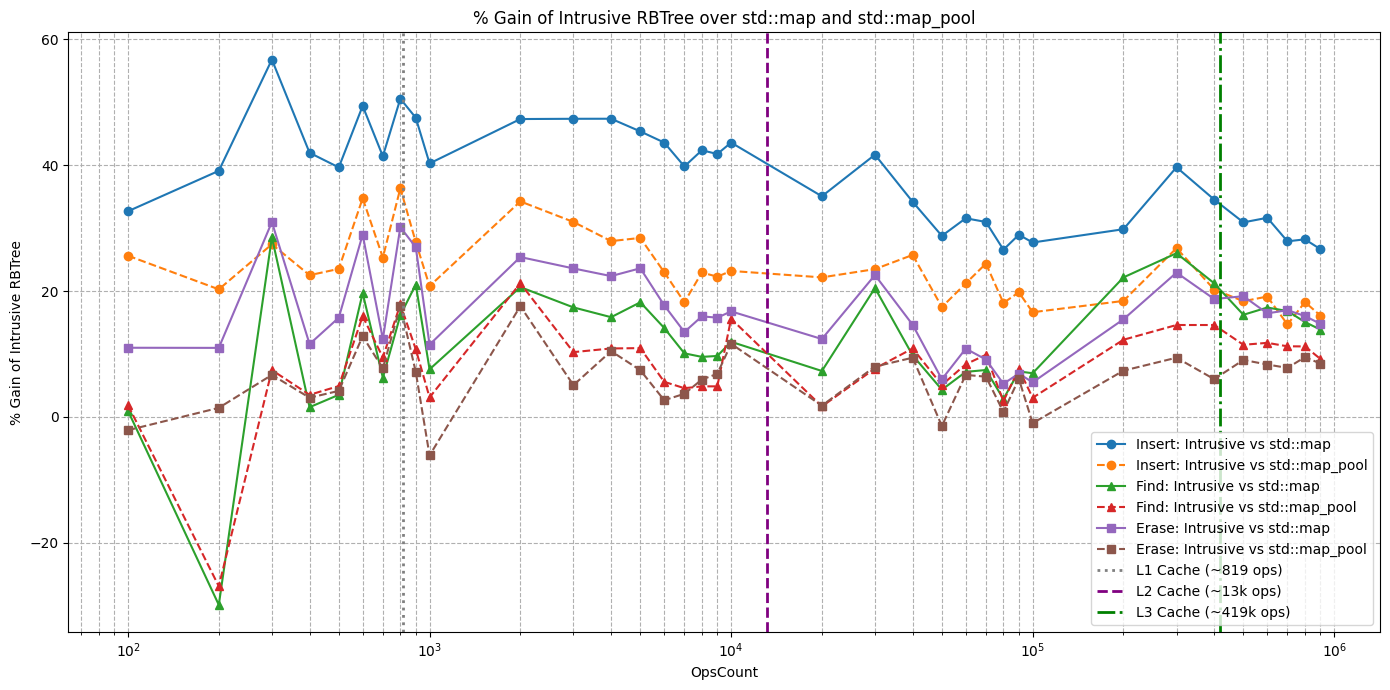

In [19]:
plt.figure(figsize=(14,7))
plt.plot(gains.index, gains['Insert_vs_std'], label='Insert: Intrusive vs std::map', marker='o')
plt.plot(gains.index, gains['Insert_vs_pool'], label='Insert: Intrusive vs std::map_pool', marker='o', linestyle='--')
plt.plot(gains.index, gains['Find_vs_std'], label='Find: Intrusive vs std::map', marker='^')
plt.plot(gains.index, gains['Find_vs_pool'], label='Find: Intrusive vs std::map_pool', marker='^', linestyle='--')
plt.plot(gains.index, gains['Erase_vs_std'], label='Erase: Intrusive vs std::map', marker='s')
plt.plot(gains.index, gains['Erase_vs_pool'], label='Erase: Intrusive vs std::map_pool', marker='s', linestyle='--')

plt.axvline(x=819, color='grey', linestyle=':', linewidth=2, label='L1 Cache (~819 ops)')
plt.axvline(x=13_107, color='purple', linestyle='--', linewidth=2, label='L2 Cache (~13k ops)')
plt.axvline(x=419_430, color='green', linestyle='-.', linewidth=2, label='L3 Cache (~419k ops)')

# Remove duplicate legend labels
handles, labels = plt.gca().get_legend_handles_labels()
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())


plt.xscale('log')
plt.xlabel('OpsCount')
plt.ylabel('% Gain of Intrusive RBTree')
plt.title('% Gain of Intrusive RBTree over std::map and std::map_pool')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.tight_layout()
plt.show()
